In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.manifoldlib as tmf

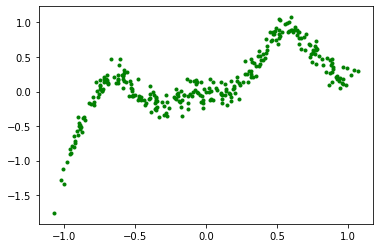

In [2]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
# xx = x.reshape(-1,1)
# yy = y.reshape(-1,1)
xx = np.c_[x,y]

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

## Manifold with multiple(N) points

In [3]:
n_points = 3
manifold = tmf.SplineManifold1D(2, n_points, 2)

In [13]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.show()

for step in range(100000):
    
    yy = manifold.forward(xx)
    manifold.backward()
    manifold.update(0.1)
    
    if step % 100 == 0:
        
        loss = np.mean(manifold.errors)
        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', color='g', label='x,y')
        
        plt.scatter(yy[:,0], yy[:,1], c='r', lw=2, marker='.', label='x,y_out')
        
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.006017690705431477

_______________________
epoch 100
Loss 0.005527478216665532

_______________________
epoch 200
Loss 0.005215535993051576

_______________________
epoch 300
Loss 0.004973573787382221

_______________________
epoch 400
Loss 0.004740316227051542

_______________________
epoch 500
Loss 0.004512072148043988

_______________________
epoch 600
Loss 0.004314062252970205

_______________________
epoch 700
Loss 0.004136028416907417

_______________________
epoch 800
Loss 0.003967250656719086

_______________________
epoch 900
Loss 0.003811074379052719

_______________________
epoch 1000
Loss 0.003668195121936845

_______________________
epoch 1100
Loss 0.00347779458414486

_______________________
epoch 1200
Loss 0.003338758617241559

_______________________
epoch 1300
Loss 0.0032380737242167193

_______________________
epoch 1400
Loss 0.0031450984107852455

_______________________
epoch 1500
Loss 0.0030790767119280773

__________________


_______________________
epoch 13100
Loss 0.002632547964518045

_______________________
epoch 13200
Loss 0.0026323409391765962

_______________________
epoch 13300
Loss 0.002632140548239374

_______________________
epoch 13400
Loss 0.0026319458554261922

_______________________
epoch 13500
Loss 0.002631755799087579

_______________________
epoch 13600
Loss 0.0026315699159940096

_______________________
epoch 13700
Loss 0.0026313878298954967

_______________________
epoch 13800
Loss 0.00263120920736442

_______________________
epoch 13900
Loss 0.0026310337527146945

_______________________
epoch 14000
Loss 0.0026308612035637687

_______________________
epoch 14100
Loss 0.0026306913269421614

_______________________
epoch 14200
Loss 0.0026305239158743226

_______________________
epoch 14300
Loss 0.0026303587863682563

_______________________
epoch 14400
Loss 0.002630195774761556

_______________________
epoch 14500
Loss 0.0026300347353793844

_______________________
epoch 14600
Loss 0.00

TclError: invalid command name "pyimage119"

In [14]:
manifold.add_point()

In [15]:
# np.argmin(np.abs(manifold.projection[manifold.range_index==0] - manifold.X[1])[:,0])

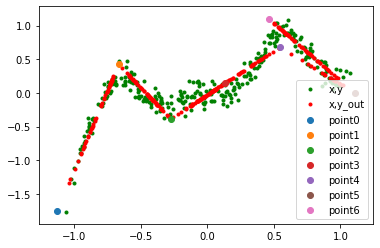

In [16]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g', label='x,y')
plt.scatter(yy[:,0], yy[:,1], marker='.', c='r', label='x,y_out')
for i in range(len(manifold.X)):
    plt.scatter(manifold.X[i,0], manifold.X[i,1], label=f"point{i}")
plt.legend()

In [ ]:
yy[manifold.range_index==1]

In [ ]:
manifold._projtemp[manifold.range_index==1]

In [ ]:
manifold.X

In [ ]:
# np.insert()